# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

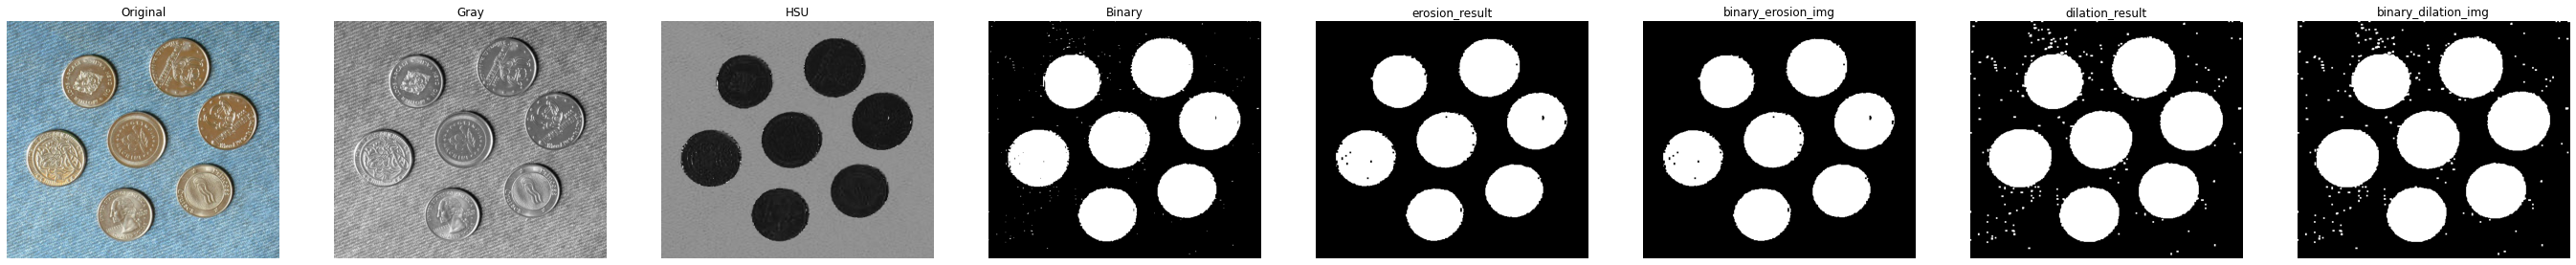

In [2]:
'''
1) Erosion / Dilation:zeinab
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
def erosion(img,structuring_element,num):
    output = np.zeros_like(img)
    image_padded = np.ones(
        (img.shape[0] + structuring_element.shape[0] - 1, img.shape[1] +structuring_element.shape[1] - 1)
    )
    
    image_padded[structuring_element.shape[0] - 2 : -1 :, structuring_element.shape[1] - 2 : -1 :] = img

    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            summation = (
           structuring_element * image_padded[y : y +structuring_element.shape[0], x : x + structuring_element.shape[1]]
            ).sum()
            output[y, x] = int(summation == num)
    return output

    
def dilation(img,structuring_element):
    output = np.zeros_like(img)
    image_padded = np.zeros(
        (img.shape[0] + structuring_element.shape[0] - 1, img.shape[1] +structuring_element.shape[1] - 1)
    )
    
    image_padded[structuring_element.shape[0] - 2 : -1 :, structuring_element.shape[1] - 2 : -1 :] = img

    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            summation = (
                structuring_element * image_padded[y : y +structuring_element.shape[0], x : x + structuring_element.shape[1]]
            ).sum()
            output[y, x] = int(summation > 0)
    return output    
img =io.imread('./img/coins.jpg')
def rgbtobinary(img):
    gray_img=rgb2gray(img)
    HSU=rgb2hsv(img)[:,:,0]
    binary=rgb2hsv(img)[:,:,0] < 0.5
    structuring_element = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    erosion_result=erosion(binary,structuring_element,9)
    dilation_result=dilation(binary,structuring_element)
    binary_erosion_img=binary_erosion(binary, structuring_element)
    binary_dilation_img= binary_dilation(binary, structuring_element)
    show_images([img,gray_img,HSU,binary,
                 erosion_result,
                 binary_erosion_img,
                 dilation_result,
                 binary_dilation_img],
               ['Original','Gray','HSU','Binary',
                 'erosion_result',
                 'binary_erosion_img',
                 'dilation_result',
                 'binary_dilation_img']
               )
rgbtobinary(img)


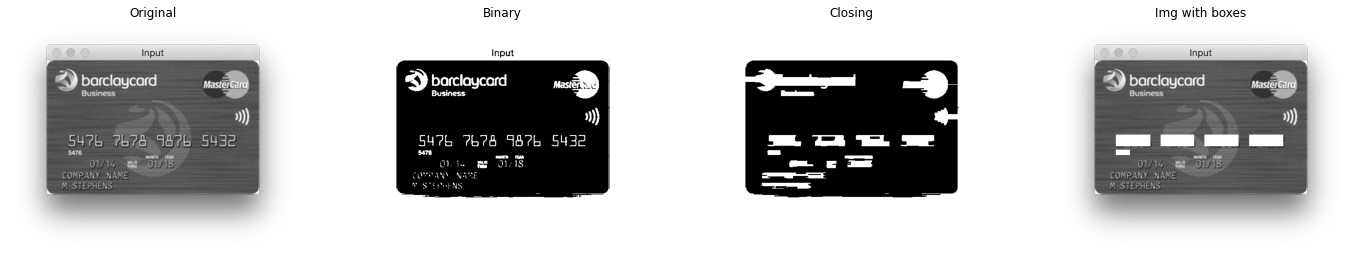

In [10]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
                
'''
card = rgb2gray(io.imread('./img/card.jpg'))
imgCopy = np.copy(card)
binImg = imgCopy > 0.58
structuring_element = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
closingImg = binary_erosion(binary_dilation(binImg,structuring_element),structuring_element)
# closingImg = erosion(dilation(binImg,structuring_element),structuring_element,40)

imgContour = find_contours(closingImg,0.8)

bounding_boxes = []
for bound in imgContour:
    box = [min(bound[:,1]),max(bound[:,1]),min(bound[:,0]),max(bound[:,0])]
    aspectRatio = abs(box[0]-box[1])/abs(box[2]-box[3])
    if(aspectRatio >= 2.5 and aspectRatio <= 3.5):
        bounding_boxes.append(box)
    

# #When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=binImg.shape)
    imgCopy[rr.astype(int), cc.astype(int)] = 1 #set color white
    
    
show_images([card,binImg,closingImg,imgCopy],['Original','Binary','Closing','Img with boxes']) 

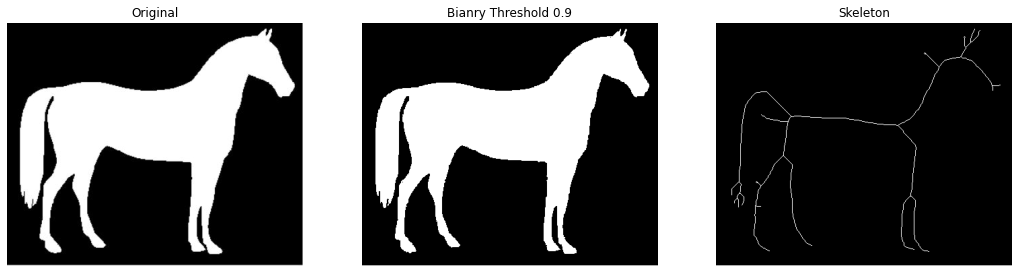

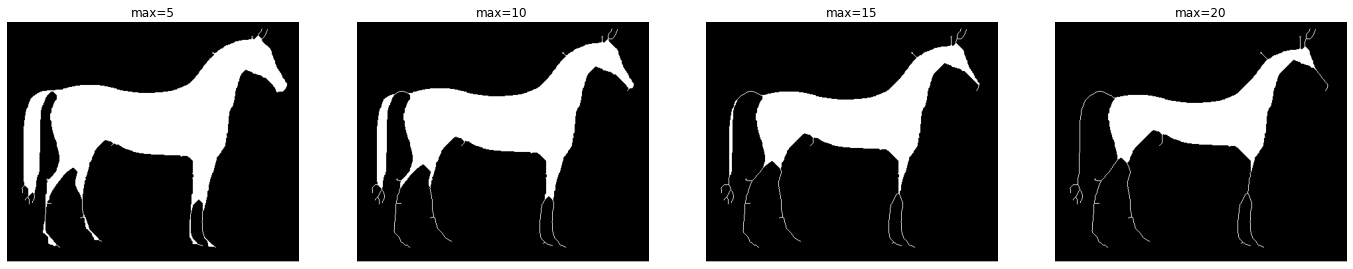

Skeletonization VS Thinning up to 200 iterations


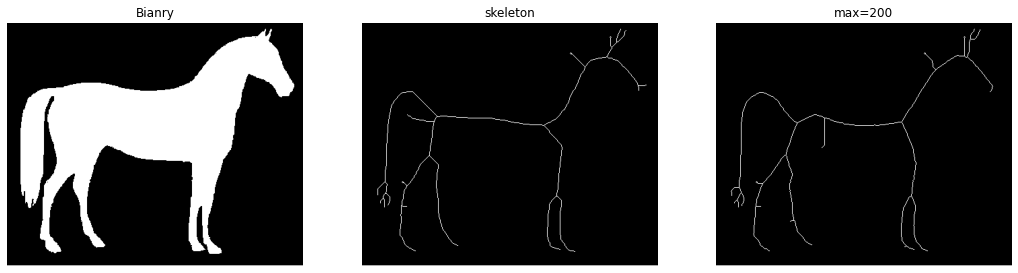

In [8]:
'''
3) Skeletonization: bassma
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
#Read Image
original_img=io.imread('./img/horse.jpg')/256
# RGB to grey Scale
original_img=rgb2gray(original_img)

#Binary Threshold (above 0.9 =1 less 0.9 =0)
binary_img=(original_img>0.9).astype(int)
# print(binary_img)

# skeletonize
skeleton=skeletonize(binary_img)
show_images([original_img,binary_img,skeleton],titles=['Original','Bianry Threshold 0.9','Skeleton'])
# skeletonize not change border
# iterative Function remove each cycle 
thninned5=thin(binary_img,5)
thninned10=thin(binary_img,10)
thninned15=thin(binary_img,15)
thninned20=thin(binary_img,20)
thninned200=thin(binary_img,200)
show_images([thninned5,thninned10,thninned15,thninned20],titles=['max=5','max=10','max=15','max=20'])

print("Skeletonization VS Thinning up to 200 iterations")
show_images([binary_img,skeleton,thninned200],titles=['Bianry','skeleton','max=200'])

Thinning and Skeletionization are useful for image analysis in pattern recognition, for example, for optical character recognition (OCR).


A way for obtainning Skelton is sucessive thinning but this isn't the way skeltonize is implemented

Thinning: Starts from the whole objects and keeps cutting off from it till he couldn't =>(disconnection so he has to stop)
Skeletonize: starts from the center of the object and keeps tracking if this extra region will add extra thing for mw or not

By our nick eye we can say that there is not a lot of difference. Iterating a thinning until convergence is one way to compute the skeleton.[What we did thin from max =200] 

***The main difference:
Unlike the thinning operation, skeleton retains the size of the input object.